In [2]:
import pandas as pd
import datasets
from datasets import load_dataset, Dataset, DatasetDict

Qdata_frame = pd.read_csv('../dataset/train3_v4.csv')

c:\Users\user\Desktop\QuestionQuestionModel\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
duplicated = Qdata_frame.duplicated(subset=['String'])
Qdata_frame = Qdata_frame.drop_duplicates(subset=['String'])
Qdata_frame['topic'] = Qdata_frame['topic'].apply(lambda x: x.strip().split(', '))
Qdata_frame

,id,String,topic,type
0,1,Which of the following are components of an in...,[Introduction to Information Processing],MC
1,2,Which of the following is an example of data c...,[Introduction to Information Processing],MC
2,3,Which of the following personnels is responsib...,[Introduction to Information Processing],MC
3,4,Which of the following is not a valid way to i...,[Introduction to Information Processing],MC
4,5,Which of the following is/are (a) method(s) of...,[Data Organisation and Data Control],MC
...,...,...,...,...
809,810,"In the case of (d)(i), will ALG1 or ALG2 be mo...","[Algorithm Design, Program Development]",LQ
810,811,What is the benefit of using an array to store...,[Algorithm Design],LQ
811,812,There are different kinds of online shopping w...,"[Database, Threats and Security on the Interne...",MC
812,813,A search engine can automatically the search r...,"[Internet Services and Applications, Networkin...",MC


In [4]:
class_dict = {
'Algorithm Design': "Algorithm Design", 
'Communication Software and Protocols': "Networking and Internet Basics", 
'Computer System': "Computer System", 
'Data Manipulation and Analysis': "Data Manipulation and Analysis", 
'Data Organisation and Data Control': "Data Organisation and Data Control", 
'Database': "Spreadsheets and Databases", 
'Elementary Web Authoring': "Elementary Web Authoring", 
'Health and Ethical Issues': "Health and Ethical Issues", 
'Input and Output Devices': "Basic Machine Organisation", 
'Intellectual Property': "Intellectual Property", 
'Internet Services and Applications': "Internet Services and Applications", 
'Introduction to HTML': "Elementary Web Authoring", 
'Introduction to Information Processing': "Information Processing", 
'Multimedia Elements': "Multimedia Elements", 
'Number System': "Data Organisation and Data Control", 
'Problem- Formulation and Analysis': "Program Development", 
'Program Development': "Program Development", 
'Program Testing and Debugging': "Program Development", 
'Secondary Storage Devices': "Basic Machine Organisation", 
'Spreadsheet': "Spreadsheets and Databases", 
'System Software': "Computer System", 
'Networking and Internet Basics': 'Networking and Internet Basics',
'System Unit of a Computer System': "Basic Machine Organisation", 
'The Networking and Internet Basics': "Networking and Internet Basics", 
'Threats and Security on the Internet': "Threats and Security on the Internet", 
'Word Presentation': "Data Manipulation and Analysis"}

In [5]:
Qdata_frame['newTopic'] = Qdata_frame['topic'].apply(lambda topics: [class_dict[topic] for topic in topics])


In [7]:
import re
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def clean_text(text):
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [9]:
Qdata_frame['CleanString'] = Qdata_frame['String'].apply(clean_text)

In [10]:
# labelling
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Qdata_frame.reset_index(inplace=True)
Qdf = Qdata_frame.join(pd.DataFrame(mlb.fit_transform(Qdata_frame['newTopic']), columns=mlb.classes_))

In [12]:
Qdf

,level_0,index,id,String,topic,type,newTopic,CleanString,Algorithm Design,Basic Machine Organisation,...,Elementary Web Authoring,Health and Ethical Issues,Information Processing,Intellectual Property,Internet Services and Applications,Multimedia Elements,Networking and Internet Basics,Program Development,Spreadsheets and Databases,Threats and Security on the Internet
0,0,0,1,Which of the following are components of an in...,[Introduction to Information Processing],MC,[Information Processing],following components information system,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,2,Which of the following is an example of data c...,[Introduction to Information Processing],MC,[Information Processing],following example data collection,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,2,3,Which of the following personnels is responsib...,[Introduction to Information Processing],MC,[Information Processing],following personnels responsible performing ba...,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,3,4,Which of the following is not a valid way to i...,[Introduction to Information Processing],MC,[Information Processing],following valid way improve students informati...,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4,4,5,Which of the following is/are (a) method(s) of...,[Data Organisation and Data Control],MC,[Data Organisation and Data Control],following method control ensures reasonablenes...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,801,809,810,"In the case of (d)(i), will ALG1 or ALG2 be mo...","[Algorithm Design, Program Development]",LQ,"[Algorithm Design, Program Development]",case alg alg efficient explain briefly,1,0,...,0,0,0,0,0,0,0,1,0,0
802,802,810,811,What is the benefit of using an array to store...,[Algorithm Design],LQ,[Algorithm Design],benefit using array store strings,1,0,...,0,0,0,0,0,0,0,0,0,0
803,803,811,812,There are different kinds of online shopping w...,"[Database, Threats and Security on the Interne...",MC,"[Spreadsheets and Databases, Threats and Secur...",different kinds online shopping websites featu...,0,0,...,0,0,0,0,0,0,0,0,1,1
804,804,812,813,A search engine can automatically the search r...,"[Internet Services and Applications, Networkin...",MC,"[Internet Services and Applications, Networkin...",search engine automatically search results rel...,0,0,...,0,0,0,0,1,0,1,0,0,0


In [13]:
# split the train, test, and validation data
import sklearn
from sklearn.model_selection import train_test_split

train_data, valid_data = train_test_split(Qdf, test_size=0.2, random_state=42)

In [14]:
train_data

,level_0,index,id,String,topic,type,newTopic,CleanString,Algorithm Design,Basic Machine Organisation,...,Elementary Web Authoring,Health and Ethical Issues,Information Processing,Intellectual Property,Internet Services and Applications,Multimedia Elements,Networking and Internet Basics,Program Development,Spreadsheets and Databases,Threats and Security on the Internet
787,787,795,796,Ada uses the following pseudocode to represent...,[Program Development],LQ,[Program Development],ada uses following pseudocode represent algori...,0,0,...,0,0,0,0,0,0,0,1,0,0
637,637,644,645,The World Health Organisation (WHO) states tha...,[Health and Ethical Issues],MC,[Health and Ethical Issues],world health organisation states world populat...,0,0,...,0,1,0,0,0,0,0,0,0,0
444,444,448,449,A code consists of 6 digits where the digit on...,[Data Organisation and Data Control],MC,[Data Organisation and Data Control],code consists digits digit far right check dig...,0,0,...,0,0,0,0,0,0,0,0,0,0
332,332,335,336,Why do some people promote open source softwar...,[Intellectual Property],LQ,[Intellectual Property],people promote open source software instead fr...,0,0,...,0,0,0,1,0,0,0,0,0,0
291,291,292,293,A TV unit has the following three ports. High ...,[System Unit of a Computer System],MC,[Basic Machine Organisation],tv unit following three ports high definition ...,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,71,72,Jake is storing the telephone number of member...,[Spreadsheet],MC,[Spreadsheets and Databases],jake storing telephone number members gym cent...,0,0,...,0,0,0,0,0,0,0,0,1,0
106,106,106,107,Suggest a primary key for INTERVIEW.,[Database],LQ,[Spreadsheets and Databases],suggest primary key interview,0,0,...,0,0,0,0,0,0,0,0,1,0
270,270,271,272,Give two advantages of subscribing to a cloud ...,[Intellectual Property],LQ,[Intellectual Property],give two advantages subscribing cloud service ...,0,0,...,0,0,0,1,0,0,0,0,0,0
435,435,438,439,"In HTML, which of the following are the attrib...",[Introduction to HTML],MC,[Elementary Web Authoring],html following attributes table table,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
valid_data

,level_0,index,id,String,topic,type,newTopic,CleanString,Algorithm Design,Basic Machine Organisation,...,Elementary Web Authoring,Health and Ethical Issues,Information Processing,Intellectual Property,Internet Services and Applications,Multimedia Elements,Networking and Internet Basics,Program Development,Spreadsheets and Databases,Threats and Security on the Internet
697,697,705,706,Teachers sometimes request Peter to install so...,[Computer System],LQ,[Computer System],teachers sometimes request peter install softw...,0,0,...,0,0,0,0,0,0,0,0,0,0
296,296,297,298,"In an email application, the settings of X a...",[Internet Services and Applications],MC,[Internet Services and Applications],email application settings x used receiving em...,0,0,...,0,0,0,0,1,0,0,0,0,0
227,227,228,229,Can line 1 be changed to 'result \u2190 R[1]'?...,"[Algorithm Design, Program Development]",LQ,"[Algorithm Design, Program Development]",line changed result u r explain briefly,1,0,...,0,0,0,0,0,0,0,1,0,0
336,336,339,340,Mr Chan executes the following SQL command. Wh...,[Database],LQ,[Spreadsheets and Databases],mr chan executes following sql command output,0,0,...,0,0,0,0,0,0,0,0,1,0
537,537,541,542,Which of the following are the latest trends i...,[Secondary Storage Devices],MC,[Basic Machine Organisation],following latest trends hard disk drive develo...,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,668,675,676,Should SDRAM replace the flash memory in the ...,[Computer System],LQ,[Computer System],sdram replace flash memory tablet pc explain b...,0,0,...,0,0,0,0,0,0,0,0,0,0
673,673,680,681,Peter buys two computers with the following sp...,[Secondary Storage Devices],LQ,[Basic Machine Organisation],peter buys two computers following specificati...,0,1,...,0,0,0,0,0,0,0,0,0,0
752,752,760,761,Give two considerations for developing the plu...,[Internet Services and Applications],LQ,[Internet Services and Applications],give two considerations developing plugin,0,0,...,0,0,0,0,1,0,0,0,0,0
750,750,758,759,What is the basic concept of streaming technol...,[Internet Services and Applications],LQ,[Internet Services and Applications],basic concept streaming technology,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['CleanString'])
X_valid = vectorizer.transform(valid_data['CleanString'])

In [22]:
train_data.columns[8:]

Index(['Algorithm Design', 'Basic Machine Organisation', 'Computer System',
       'Data Manipulation and Analysis', 'Data Organisation and Data Control',
       'Elementary Web Authoring', 'Health and Ethical Issues',
       'Information Processing', 'Intellectual Property',
       'Internet Services and Applications', 'Multimedia Elements',
       'Networking and Internet Basics', 'Program Development',
       'Spreadsheets and Databases', 'Threats and Security on the Internet'],
      dtype='object')

In [29]:
label = train_data.columns[8:]

In [30]:
label

Index(['Algorithm Design', 'Basic Machine Organisation', 'Computer System',
       'Data Manipulation and Analysis', 'Data Organisation and Data Control',
       'Elementary Web Authoring', 'Health and Ethical Issues',
       'Information Processing', 'Intellectual Property',
       'Internet Services and Applications', 'Multimedia Elements',
       'Networking and Internet Basics', 'Program Development',
       'Spreadsheets and Databases', 'Threats and Security on the Internet'],
      dtype='object')

In [33]:
y_train = train_data.loc[:, label]
y_valid = valid_data.loc[:, label]

In [36]:
linearSVM = SVC(kernel='linear', probability=True, random_state=42)
polySVM = SVC(kernel='poly', probability=True, random_state=42)
lrbfSVM = SVC(kernel='rbf', probability=True, random_state=42)

In [41]:
from sklearn.multioutput import MultiOutputClassifier
multilabel_classifier1 = MultiOutputClassifier(linearSVM, n_jobs=-1)
multilabel_classifier2 = MultiOutputClassifier(polySVM, n_jobs=-1)
multilabel_classifier3 = MultiOutputClassifier(lrbfSVM, n_jobs=-1)

In [52]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, accuracy_score, balanced_accuracy_score, hamming_loss
import matplotlib.pyplot as plt
import numpy as np

Linear

In [53]:
# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier1.fit(X_train, y_train)

# Get predictions for test data
y_test_pred_linear = multilabel_classifier.predict(X_valid)

In [61]:
print(classification_report(y_test_pred_linear, y_valid, target_names=label))

                                      precision    recall  f1-score   support

                    Algorithm Design       0.44      1.00      0.62         4
          Basic Machine Organisation       0.41      0.88      0.56         8
                     Computer System       0.50      1.00      0.67         5
      Data Manipulation and Analysis       0.57      1.00      0.73         4
  Data Organisation and Data Control       0.81      0.93      0.87        14
            Elementary Web Authoring       0.75      1.00      0.86         3
           Health and Ethical Issues       0.33      0.67      0.44         3
              Information Processing       0.25      1.00      0.40         2
               Intellectual Property       0.50      0.80      0.62         5
  Internet Services and Applications       0.40      1.00      0.57         4
                 Multimedia Elements       0.30      1.00      0.46         3
      Networking and Internet Basics       0.17      0.67      

c:\Users\user\Desktop\QuestionQuestionModel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
# Generate multiclass confusion matrices
matrices = multilabel_confusion_matrix(y_valid, y_test_pred_linear)

In [66]:
def mapLabel(idx):
    return label[idx]

In [65]:
label[0]

'Algorithm Design'

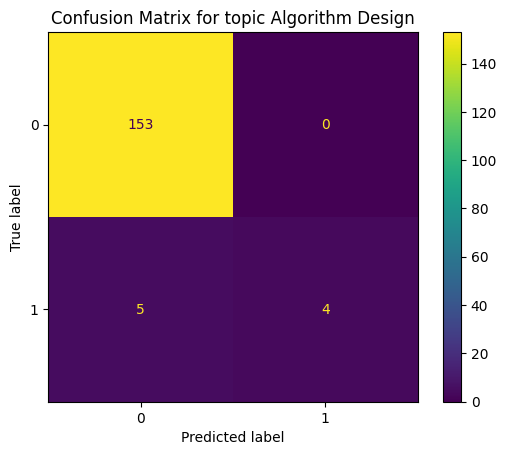

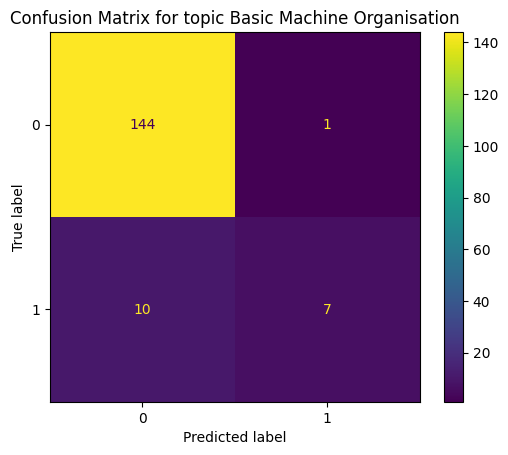

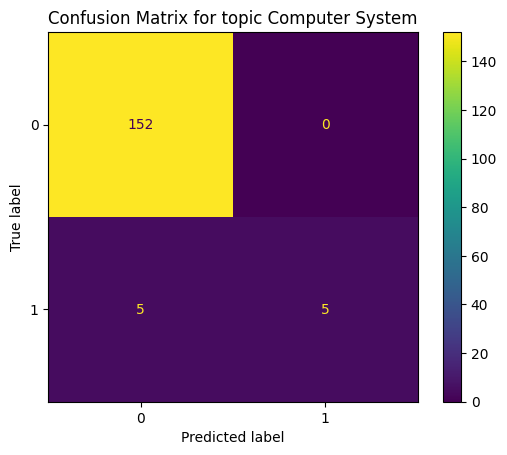

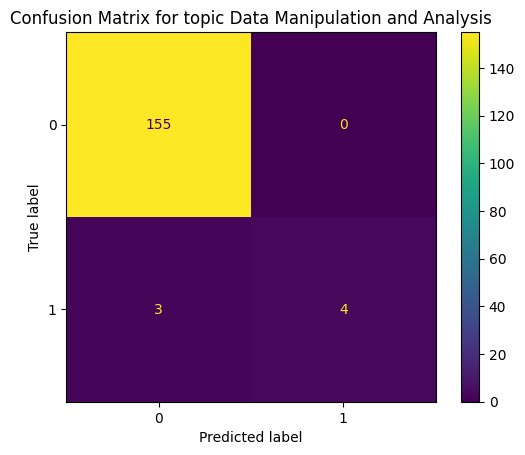

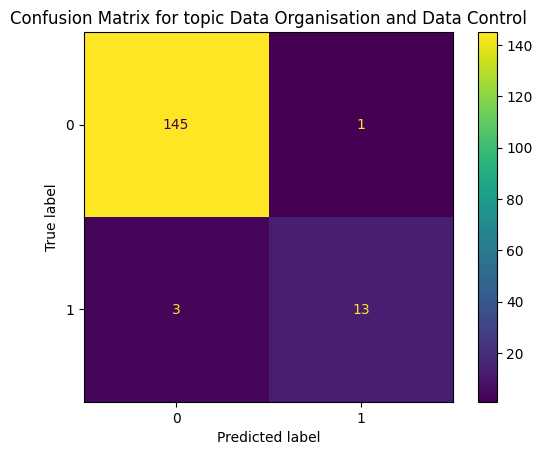

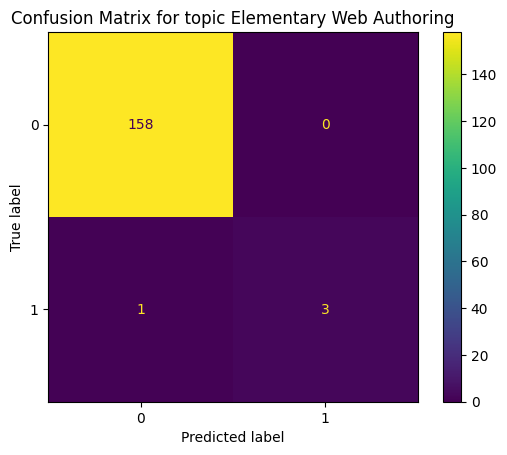

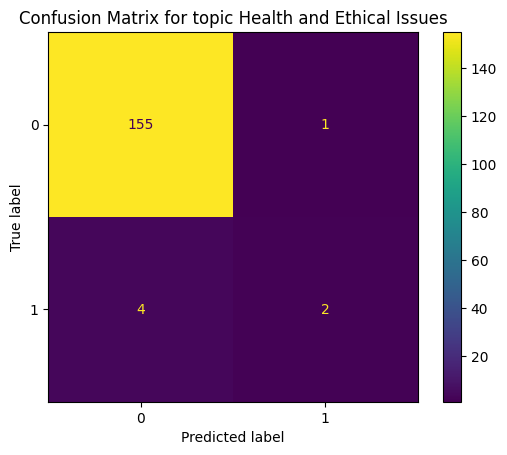

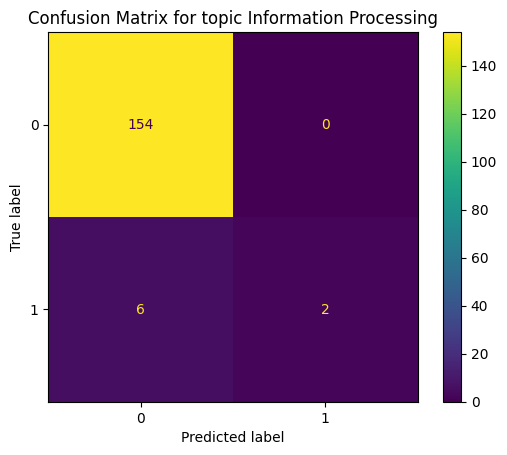

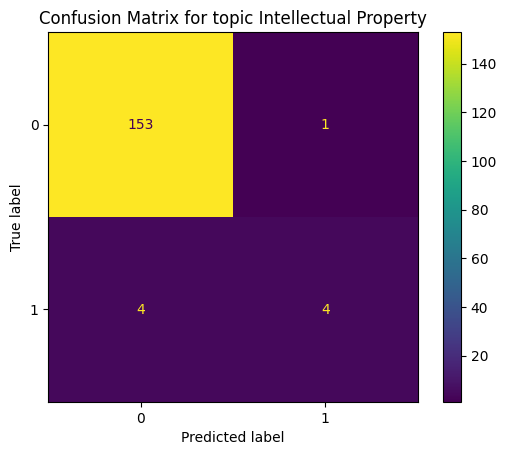

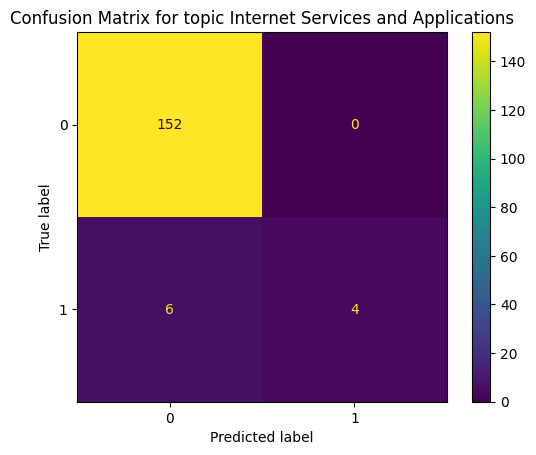

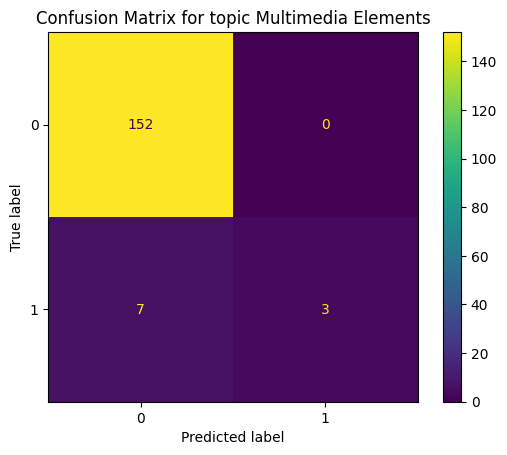

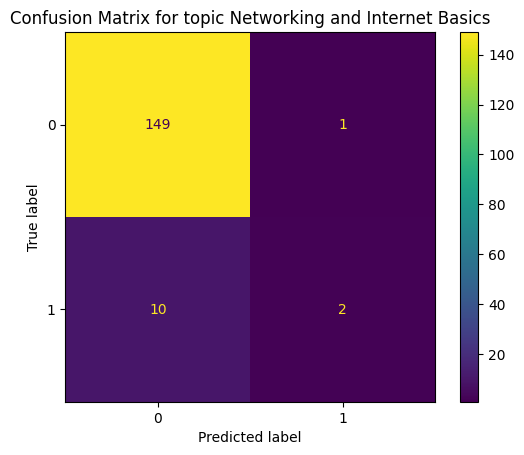

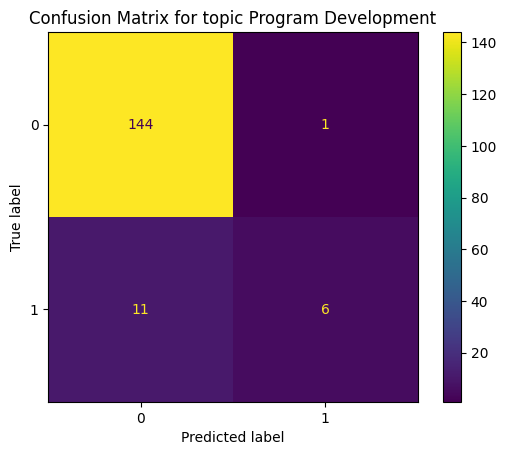

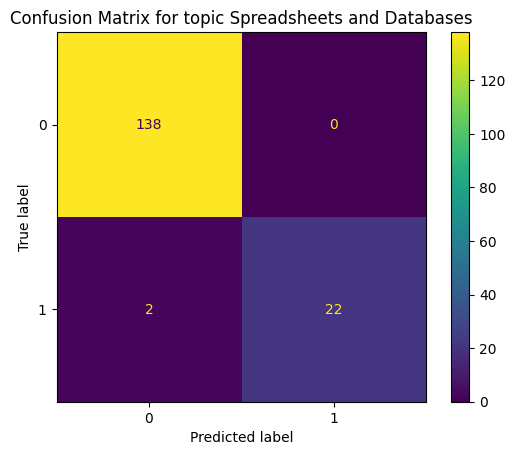

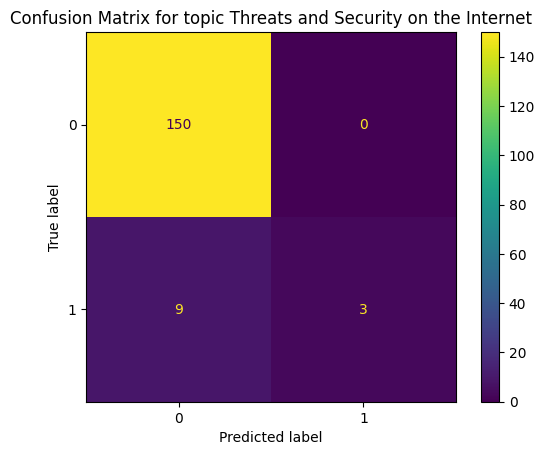

In [69]:
for x in range(len(matrices)):
    cmd = ConfusionMatrixDisplay(matrices[x], display_labels=np.unique(y_test_pred_linear)).plot()
    plt.title('Confusion Matrix for topic ' + mapLabel(x))
    plt.show()

In [75]:

print('F1-score:', f1_score(y_valid, y_test_pred_linear, average='micro'))

roc_auc = roc_auc_score(y_valid, y_test_pred_linear, average='micro')
print('ROC-AUC Curve:', roc_auc)

acc = accuracy_score(y_valid, y_test_pred_linear)
print('Accuracy:', acc)

bal_acc = balanced_accuracy_score(y_valid.values.argmax(axis=1), y_test_pred_linear.argmax(axis=1))
print('Balanced Accuracy:', bal_acc)

hamming_loss = hamming_loss(y_valid, y_test_pred_linear)
print('Hamming Loss:', hamming_loss)

F1-score: 0.6461538461538462
ROC-AUC Curve: 0.7457313899010932
Accuracy: 0.4876543209876543
Balanced Accuracy: 0.48550656812165754
Hamming Loss: 0.03786008230452675


poly

In [76]:
# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier2.fit(X_train, y_train)

# Get predictions for test data
y_valid_pred_poly = multilabel_classifier.predict(X_valid)

print(classification_report(y_valid_pred_poly, y_valid, target_names=label))

                                      precision    recall  f1-score   support

                    Algorithm Design       0.22      1.00      0.36         2
          Basic Machine Organisation       0.06      1.00      0.11         1
                     Computer System       0.00      0.00      0.00         0
      Data Manipulation and Analysis       0.00      0.00      0.00         0
  Data Organisation and Data Control       0.25      1.00      0.40         4
            Elementary Web Authoring       0.25      1.00      0.40         1
           Health and Ethical Issues       0.00      0.00      0.00         0
              Information Processing       0.00      0.00      0.00         0
               Intellectual Property       0.12      1.00      0.22         1
  Internet Services and Applications       0.00      0.00      0.00         0
                 Multimedia Elements       0.10      1.00      0.18         1
      Networking and Internet Basics       0.00      0.00      

c:\Users\user\Desktop\QuestionQuestionModel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\Desktop\QuestionQuestionModel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


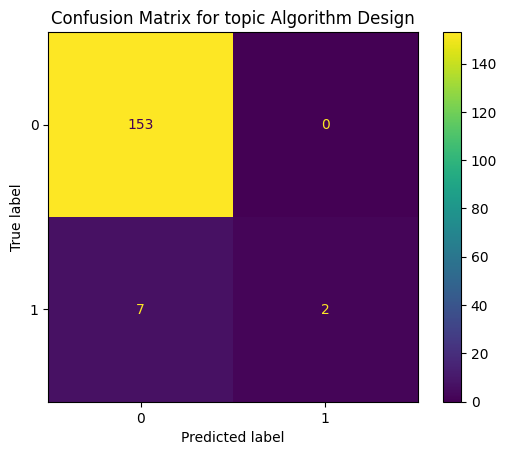

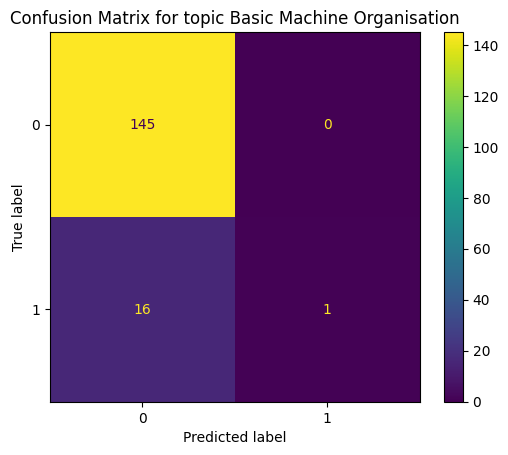

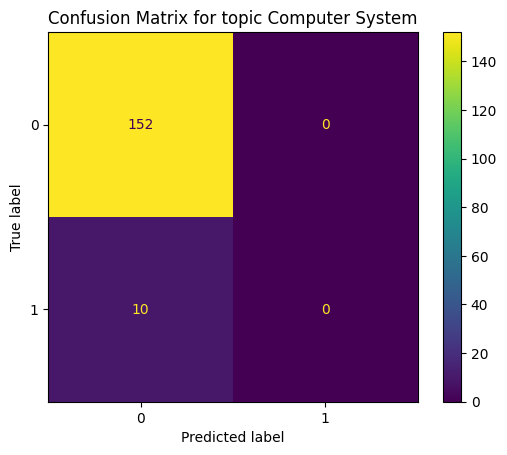

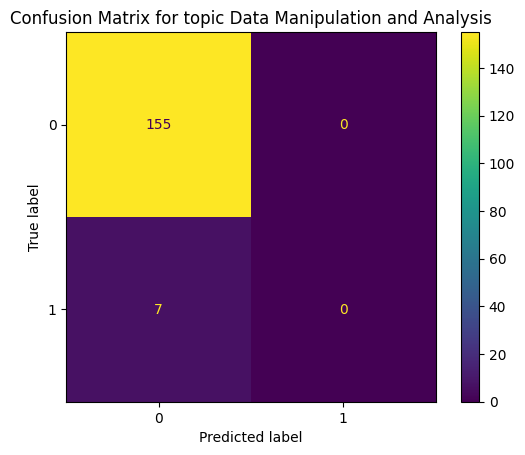

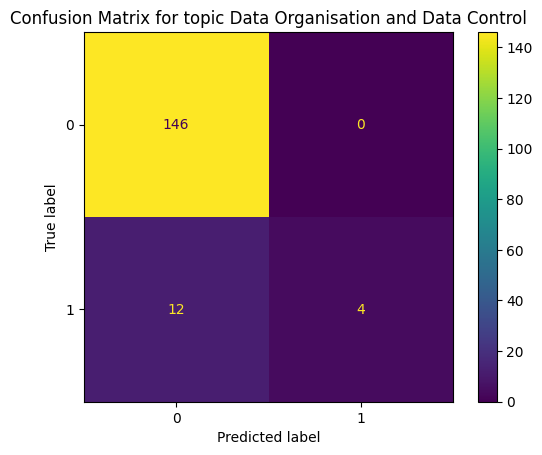

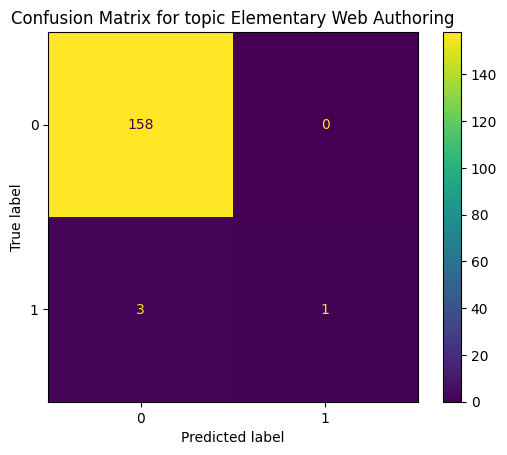

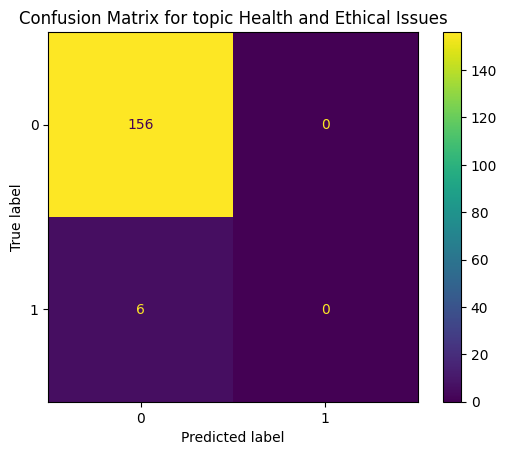

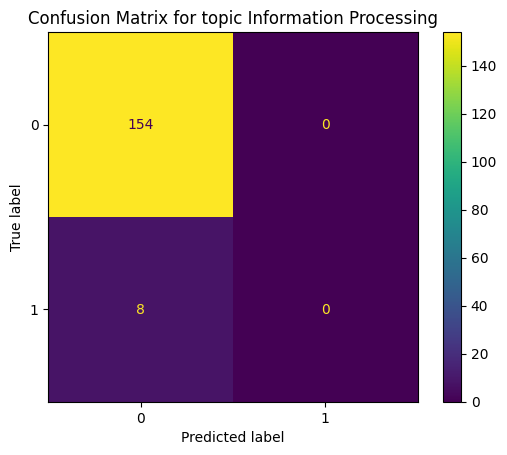

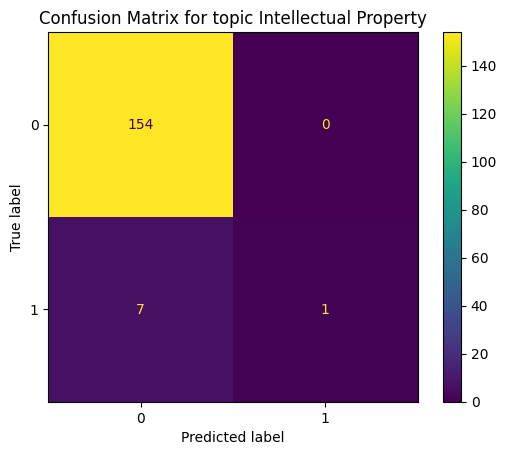

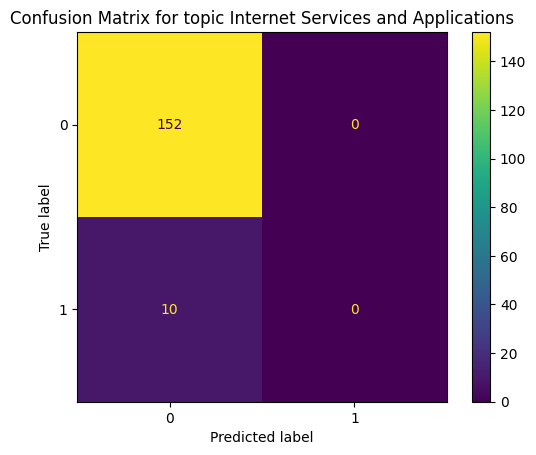

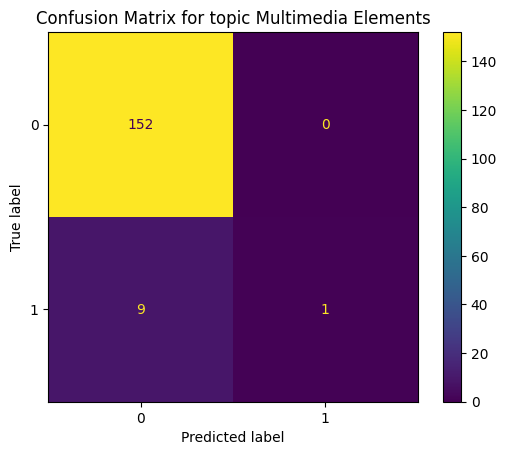

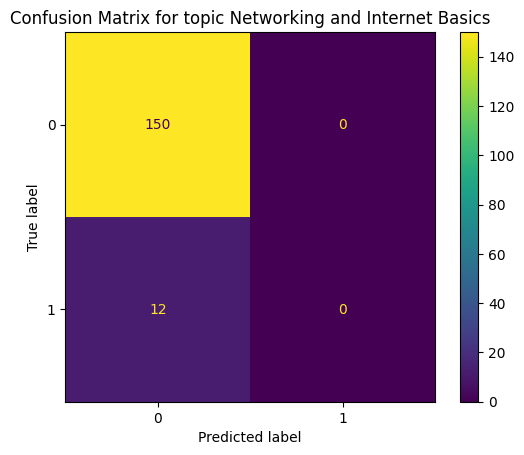

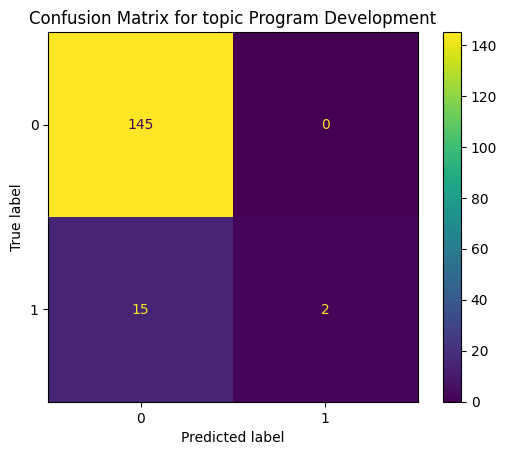

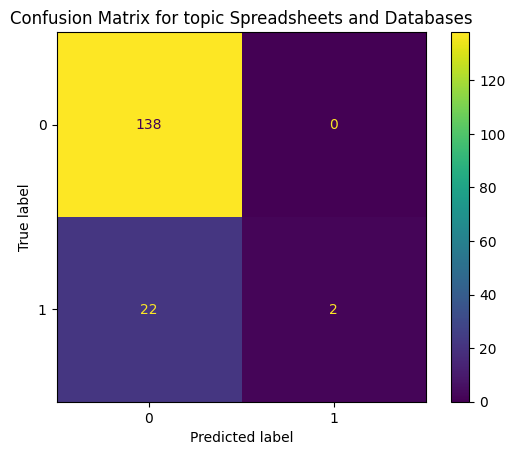

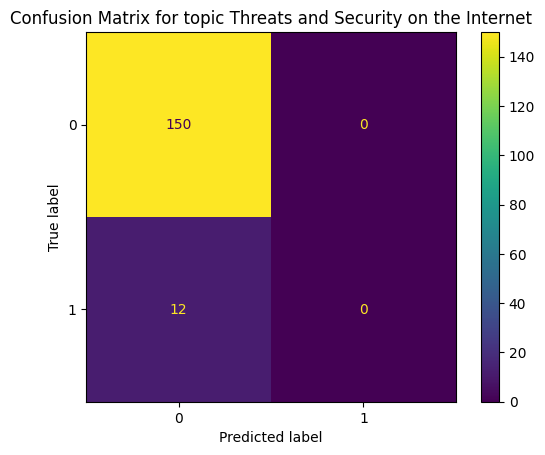

F1-score: 0.15217391304347827
ROC-AUC Curve: 0.5411764705882353
Accuracy: 0.08024691358024691
Balanced Accuracy: 0.13690629726435352


TypeError: 'float' object is not callable

In [81]:
matrices = multilabel_confusion_matrix(y_valid, y_valid_pred_poly)
for x in range(len(matrices)):
    cmd = ConfusionMatrixDisplay(matrices[x], display_labels=np.unique(y_valid_pred_poly)).plot()
    plt.title('Confusion Matrix for topic ' + mapLabel(x))
    plt.show()
    
print('F1-score:', f1_score(y_valid, y_valid_pred_poly, average='micro'))

roc_auc = roc_auc_score(y_valid, y_valid_pred_poly, average='micro')
print('ROC-AUC Curve:', roc_auc)

acc = accuracy_score(y_valid, y_valid_pred_poly)
print('Accuracy:', acc)

bal_acc = balanced_accuracy_score(y_valid.values.argmax(axis=1), y_valid_pred_poly.argmax(axis=1))
print('Balanced Accuracy:', bal_acc)

hamming_loss = hamming_loss(y_valid, y_valid_pred_poly*1.0)
print('Hamming Loss:', hamming_loss)

In [80]:
y_valid_pred_poly*1.0

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

rbf

In [82]:
# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier3.fit(X_train, y_train)

# Get predictions for test data
y_test_pred_rbf = multilabel_classifier.predict(X_valid)

In [83]:
print(classification_report(y_test_pred_rbf, y_valid, target_names=label))

                                      precision    recall  f1-score   support

                    Algorithm Design       0.22      1.00      0.36         2
          Basic Machine Organisation       0.24      0.80      0.36         5
                     Computer System       0.00      0.00      0.00         0
      Data Manipulation and Analysis       0.14      1.00      0.25         1
  Data Organisation and Data Control       0.56      1.00      0.72         9
            Elementary Web Authoring       0.25      1.00      0.40         1
           Health and Ethical Issues       0.00      0.00      0.00         0
              Information Processing       0.00      0.00      0.00         0
               Intellectual Property       0.38      1.00      0.55         3
  Internet Services and Applications       0.00      0.00      0.00         0
                 Multimedia Elements       0.10      1.00      0.18         1
      Networking and Internet Basics       0.00      0.00      

c:\Users\user\Desktop\QuestionQuestionModel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\Desktop\QuestionQuestionModel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


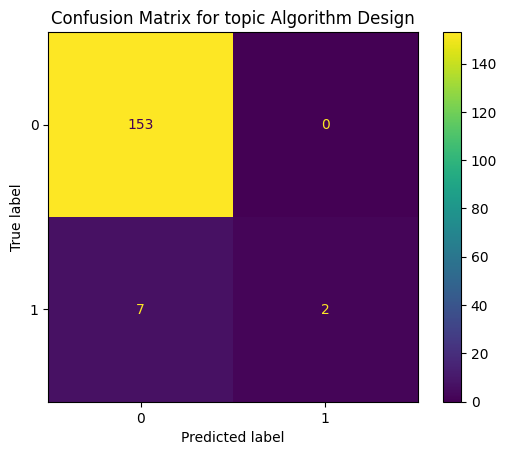

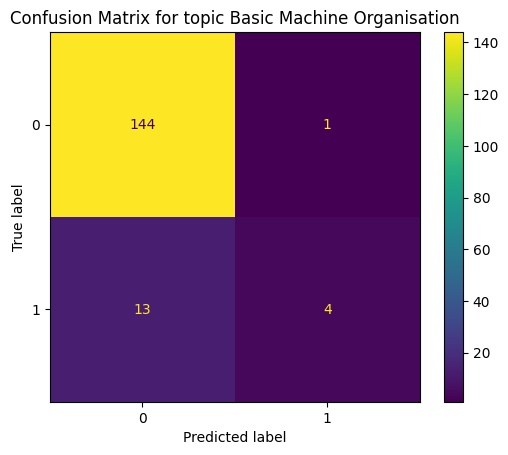

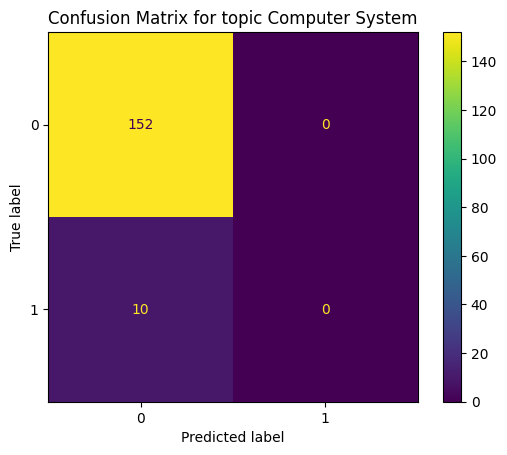

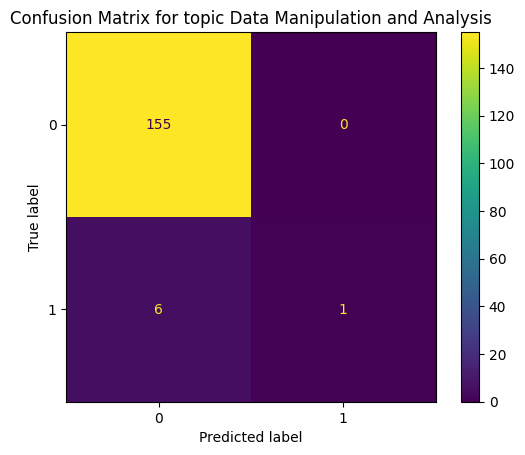

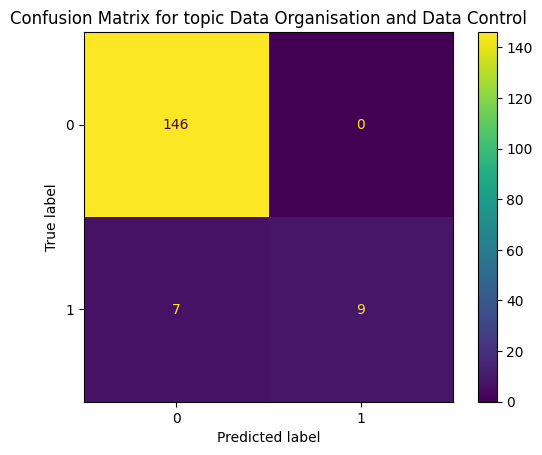

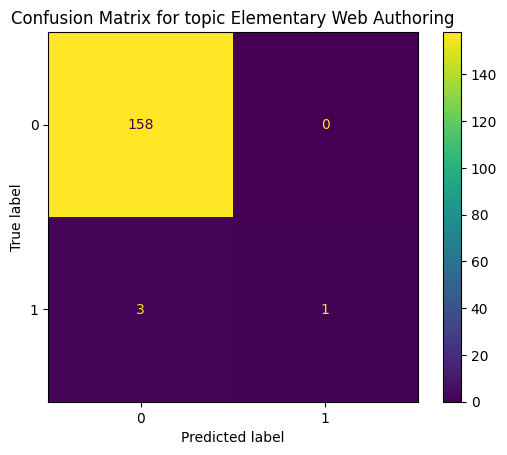

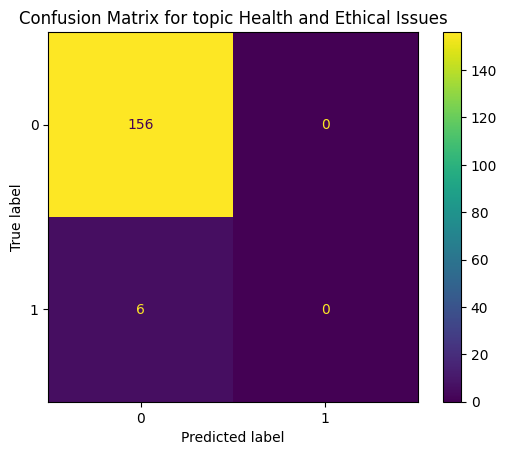

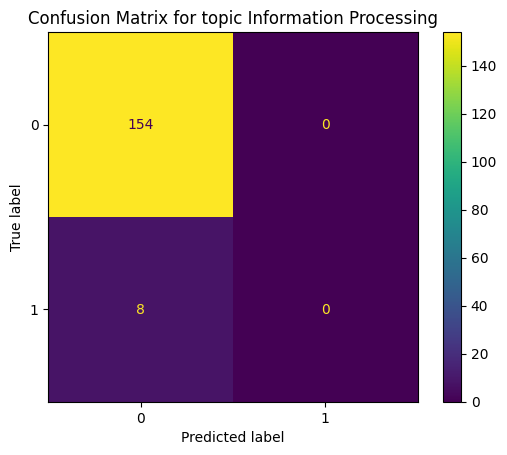

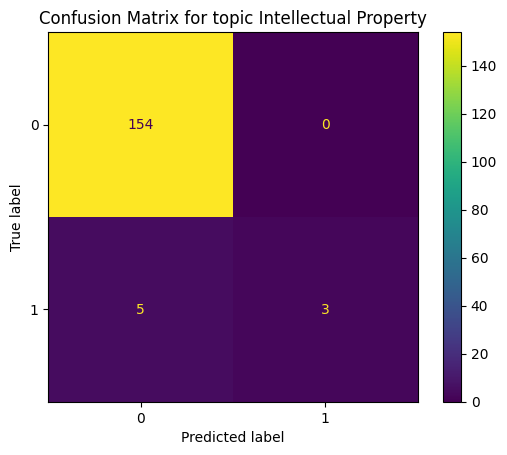

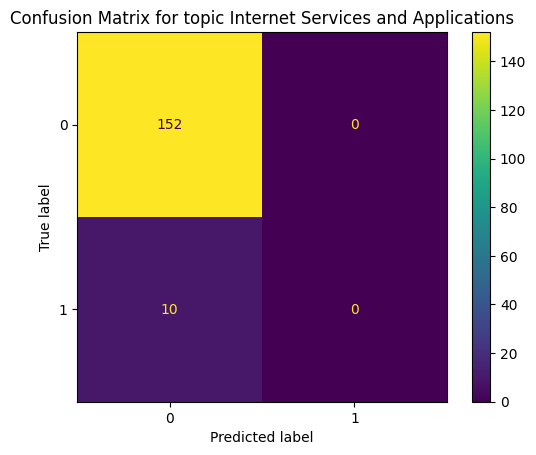

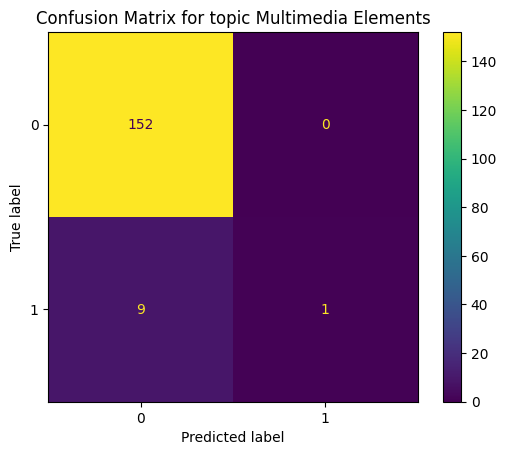

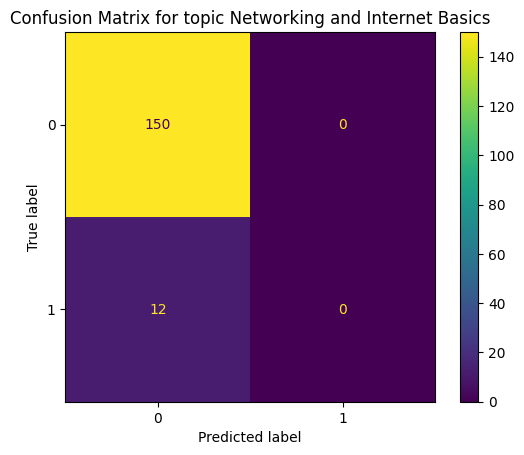

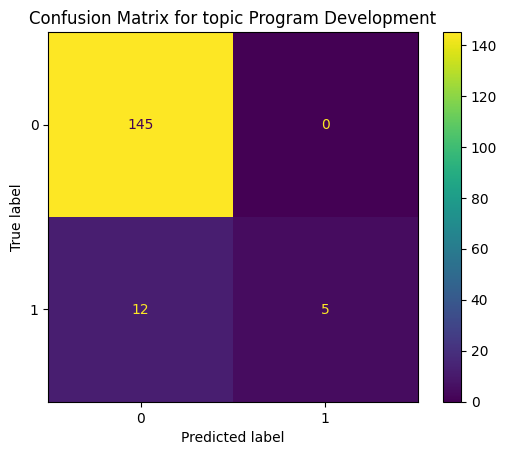

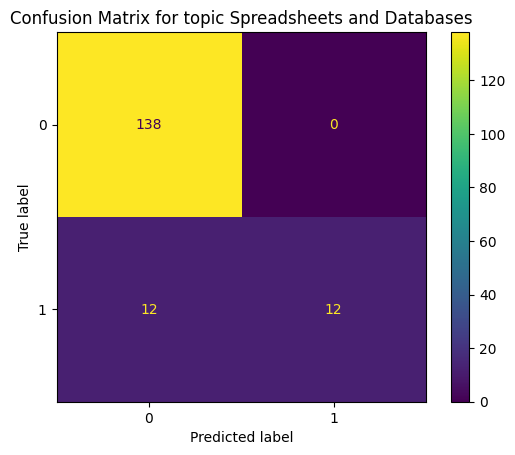

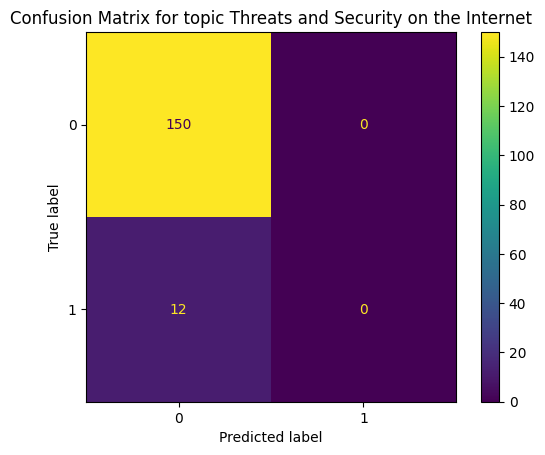

F1-score: 0.36363636363636365
ROC-AUC Curve: 0.6115434669442998
Accuracy: 0.2222222222222222
Balanced Accuracy: 0.2247820700186429


TypeError: 'float' object is not callable

In [87]:
matrices = multilabel_confusion_matrix(y_valid, y_test_pred_rbf)
for x in range(len(matrices)):
    cmd = ConfusionMatrixDisplay(matrices[x], display_labels=np.unique(y_test_pred_rbf)).plot()
    plt.title('Confusion Matrix for topic ' + mapLabel(x))
    plt.show()
    
print('F1-score:', f1_score(y_valid, y_test_pred_rbf, average='micro'))

roc_auc = roc_auc_score(y_valid, y_test_pred_rbf, average='micro')
print('ROC-AUC Curve:', roc_auc)

acc = accuracy_score(y_valid, y_test_pred_rbf)
print('Accuracy:', acc)

bal_acc = balanced_accuracy_score(y_valid.values.argmax(axis=1), y_test_pred_rbf.argmax(axis=1))
print('Balanced Accuracy:', bal_acc)

hamming_loss = hamming_loss(y_valid.values.argmax(axis=1), y_test_pred_rbf.argmax(axis=1))
print('Hamming Loss:', hamming_loss)

In [86]:
y_valid

,Algorithm Design,Basic Machine Organisation,Computer System,Data Manipulation and Analysis,Data Organisation and Data Control,Elementary Web Authoring,Health and Ethical Issues,Information Processing,Intellectual Property,Internet Services and Applications,Multimedia Elements,Networking and Internet Basics,Program Development,Spreadsheets and Databases,Threats and Security on the Internet
697,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
227,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
336,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
537,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
673,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
752,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
750,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [85]:
y_test_pred_rbf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])